<a href="https://colab.research.google.com/github/sheshanshu/Afame-Technologies/blob/main/Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sales Data Analysis:**

Exploratory Data Analysis + Decision Tree, Random Forest & Linear Regression Modeling

Greetings! I am Sheshanshu Kumar, and in this analysis, we'll be delving into a sales dataset from Afame Technologies to uncover valuable insights that can drive business decisions.


---


Problem:
Our objective is to utilize sales data analysis techniques to automate the decision-making process for identifying customer segments, predicting sales trends, and determining the best-selling products. By leveraging advanced algorithms, we aim to empower data-driven decision-making processes in sales management.


---


**Goal of the Project:**

The primary goal of this project is to analyze sales data to identify patterns, predict sales trends, and determine the best-selling products, ultimately aiding in business decision-making. To achieve this, we will delve into a sizable sales dataset, extracting insightful information to inform strategic decisions. Key objectives include:

1. Total Sales Calculation: We will compute total sales figures to understand the overall revenue generated over a given period.

2. Sales Trends Prediction: By employing decision tree, random forest, and linear regression models, we aim to predict future sales trends, identify seasonal variations, and uncover emerging market dynamics that can influence business strategies.

3. Best-Selling Products Identification: Through rigorous analysis, we will determine the best-selling products, providing valuable insights for inventory management, marketing strategies, and product development initiatives.




---


Project Scope:
This assignment serves as an opportunity to demonstrate your ability to work with and extract knowledge from large datasets. By employing advanced analytics techniques and machine learning algorithms, you will uncover actionable insights that drive revenue growth and enhance operational efficiency.

#DATA DISCOVERY

In [2]:
!pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.8 MB/s eta 0:00:00


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns
from collections import Counter
%matplotlib inline
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
import os
print(os.listdir("/content/input"))
import plotly.graph_objs as go
import seaborn as sns

['ECOMM DATA.xlsx']


In [9]:
df = pd.read_excel('/content/input/ECOMM DATA.xlsx')
df.shape

(51290, 24)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [11]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810


In [12]:
df.describe()
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [14]:
# Check the column names to ensure 'Gender' exists
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


# **Overview the sales performance in different regions**

In [30]:
df1 = data.groupby('Region')[["Sales", "Profit"]].sum().reset_index().sort_values(by="Sales",ascending=False).set_index('Region')
profitrate = df1["Profit"] / df1["Sales"]
df2 = pd.DataFrame(profitrate, columns=["Profit Rate"])
merged_df = pd.merge(df1, df2, left_index=True, right_index=True)
merged_df.rename(columns={'Profit':'Total Profit', 'Sales':'Total Sales'}, inplace=True)

merged_df

,Total Sales,Total Profit,Profit Rate
Region,,,
Central,2.822303e+06,311403.98164,0.110337
South,1.600907e+06,140355.76618,0.087673
North,1.248166e+06,194597.95252,0.155907
Oceania,1.100185e+06,120089.11200,0.109154
Southeast Asia,8.844232e+05,17852.32900,0.020185
North Asia,8.483098e+05,165578.42100,0.195186
EMEA,8.061613e+05,43897.97100,0.054453
Africa,7.837732e+05,88871.63100,0.113389
Central Asia,7.528266e+05,132480.18700,0.175977


Text(0.5, 1.0, 'Profit Rate by Region')

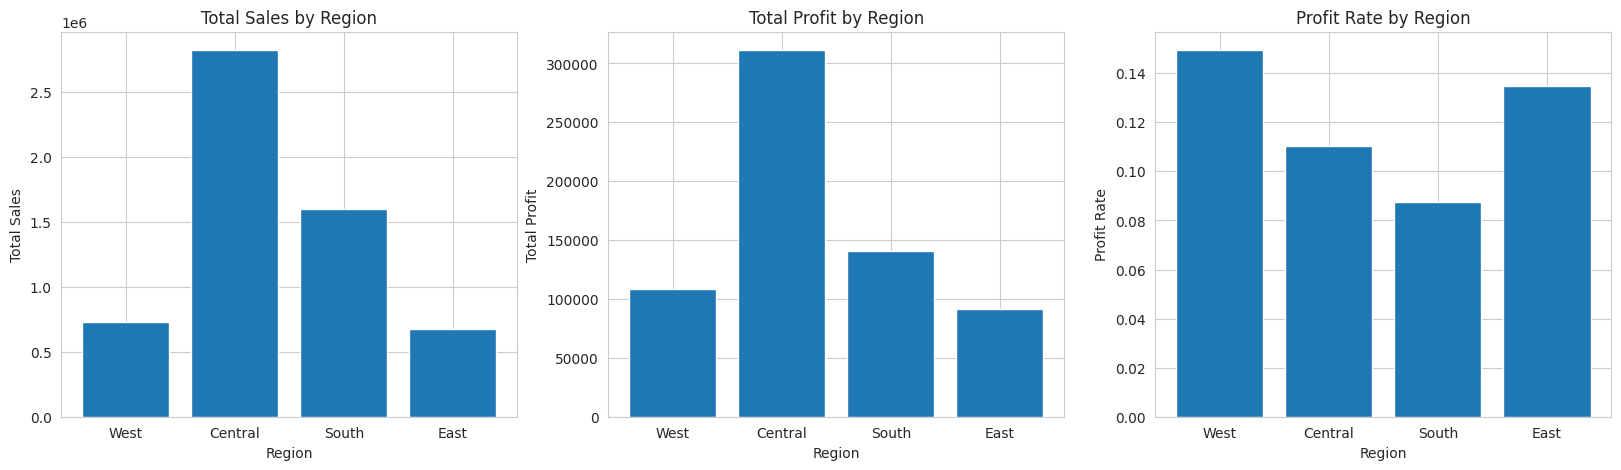

In [31]:
import matplotlib.pyplot as plt

order = ["West", "Central", "South", "East"]
sorted_df = merged_df.loc[order]

regions = sorted_df.index
Total_sales = sorted_df['Total Sales']
Total_profit = sorted_df['Total Profit']
profit_rate = sorted_df['Profit Rate']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# Plot for Total Sales
ax1.bar(regions, Total_sales)
ax1.set_xlabel('Region')
ax1.set_ylabel('Total Sales')
ax1.set_title('Total Sales by Region')

# Plot for Total Profit
ax2.bar(regions, Total_profit)
ax2.set_xlabel('Region')
ax2.set_ylabel('Total Profit')
ax2.set_title('Total Profit by Region')


 # Plot for Total Profit
ax3.bar(regions, profit_rate)
ax3.set_xlabel('Region')
ax3.set_ylabel('Profit Rate')
ax3.set_title('Profit Rate by Region')

#KPI by different Classification
Use Function to calculate Total Sales and Total Profit and Profit Rate by different Classification and sort by total sales descending

In [22]:
def kpibyvar(var, region=None):
    if region is None:
        regiondata = data  # Use all data if region is not provided
    else:
        regiondata = data.loc[data['Region'] == region]

    df1 = regiondata.groupby(var)[["Sales", "Profit"]].sum().reset_index().sort_values(by="Sales",ascending=False).set_index(var)
    profitrate = df1["Profit"] / df1["Sales"]
    df2 = pd.DataFrame(profitrate, columns=["Profit Rate"])
    merged_df = pd.merge(df1, df2, left_index=True, right_index=True)
    merged_df.rename(columns={'Profit':'Total Profit', 'Sales':'Total Sales'}, inplace=True)

    return merged_df

In [33]:
kpibyvar("Segment")

,Total Sales,Total Profit,Profit Rate
Segment,,,
Consumer,6.507949e+06,749239.78206,0.115127
Corporate,3.824698e+06,441208.32866,0.115358
Home Office,2.309855e+06,277009.18056,0.119925


In [34]:
kpibyvar("Segment","West")

,Total Sales,Total Profit,Profit Rate
Segment,,,
Consumer,362880.7730,57450.6040,0.158318
Corporate,225855.2745,34437.4299,0.152476
Home Office,136721.7770,16530.4150,0.120906


In [35]:
kpibyvar("Category","West")

,Total Sales,Total Profit,Profit Rate
Category,,,
Furniture,252612.7435,11504.9503,0.045544
Technology,251991.8320,44303.6496,0.175814
Office Supplies,220853.2490,52609.8490,0.238212


In [32]:
kpibyvar("Sub-Category","West")

,Total Sales,Total Profit,Profit Rate
Sub-Category,,,
Chairs,101781.3280,4027.5843,0.039571
Phones,98684.3520,9110.7426,0.092322
Tables,84754.5620,1482.6073,0.017493
Storage,70532.8520,8645.3222,0.122572
Accessories,61114.1160,16484.5983,0.269735
Binders,55961.1130,16096.8016,0.287643
Copiers,49749.2420,19327.2351,0.388493
Machines,42444.1220,-618.9264,-0.014582
Bookcases,36004.1235,-1646.5117,-0.045731


In [36]:
kpibyvar("State","West")

,Total Sales,Total Profit,Profit Rate
State,,,
California,457687.6315,76381.3871,0.166885
Washington,138641.2700,33402.6517,0.240929
Arizona,35282.0010,-3427.9246,-0.097158
Colorado,32108.1180,-6527.8579,-0.203309
Oregon,17431.1500,-1190.4705,-0.068296
Nevada,16729.1020,3316.7659,0.198263
Utah,11220.0560,2546.5335,0.226963
Montana,5589.3520,1833.3285,0.328004
New Mexico,4783.5220,1157.1161,0.241896


In [37]:
data.loc[:, "Year"] = pd.to_datetime(data["Order Date"]).dt.year
kpibyvar( "Year","West").reset_index().sort_values(by="Year").set_index("Year")

,Total Sales,Total Profit,Profit Rate
Year,,,
2011,147883.0330,20065.6912,0.135686
2012,139966.2495,20492.1947,0.146408
2013,186976.0165,23959.9374,0.128144
2014,250632.5255,43900.6256,0.175159


#Total Sales and Percentage In the Chart by different Classification

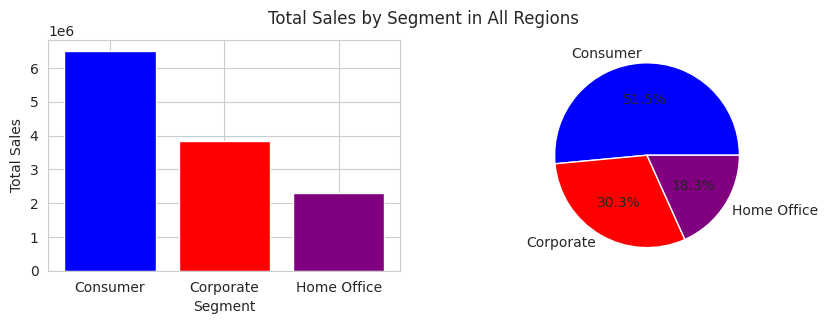

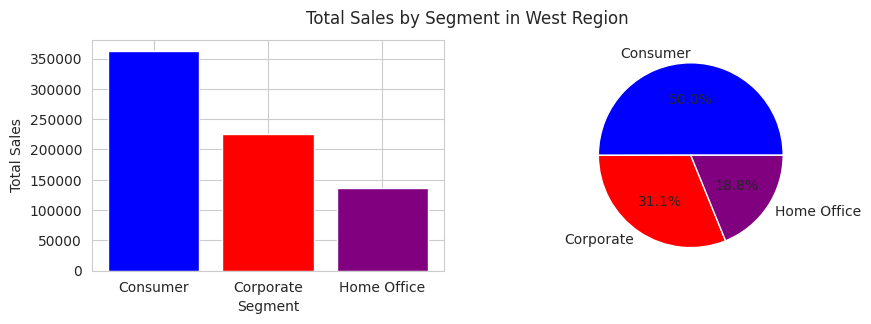

In [67]:
data = pd.read_excel('/content/input/ECOMM DATA.xlsx')  # Assuming this is how you load your dataset

def salesbyvarchart(var, region=None):
    if region is None:
        region_text = "All Regions"
    else:
        region_text = region + " Region"

    if region is not None:
        regiondata = data[data['Region'] == region]
    else:
        regiondata = data

    df1 = regiondata.groupby(var)["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False).set_index(var)
    df1.rename(columns={'Sales': 'Total Sales'}, inplace=True)
    pct = regiondata.groupby(var)[["Sales"]].sum() / regiondata["Sales"].sum()
    pct.rename(columns={'Sales': 'Sales Percentage'}, inplace=True)
    merged_df = pd.merge(df1, pct, on=var)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

    # Plot the bar chart
    colors = ['blue', 'red', 'purple', 'yellow']
    ax1.bar(merged_df.index, merged_df['Total Sales'], color=colors)
    ax1.set_xlabel(var)
    ax1.set_ylabel('Total Sales')

    # Plot the pie chart
    ax2.pie(merged_df['Sales Percentage'], labels=merged_df.index, autopct='%1.1f%%', colors=colors)
    plt.suptitle("Total Sales by " + var + " in " + region_text)
    plt.show()

# Example usage:
salesbyvarchart("Segment")
salesbyvarchart("Segment", "West")


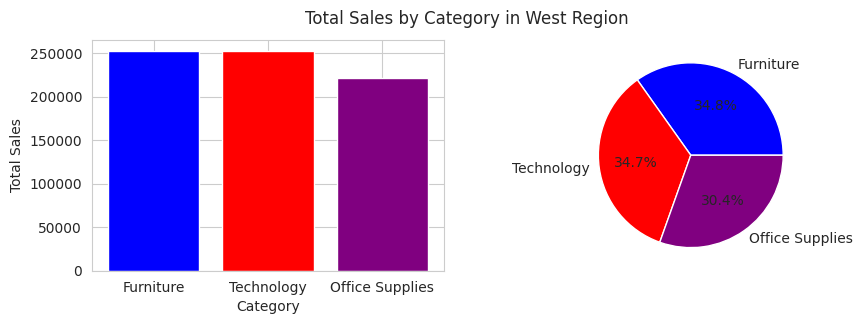

In [68]:
salesbyvarchart("Category","West")

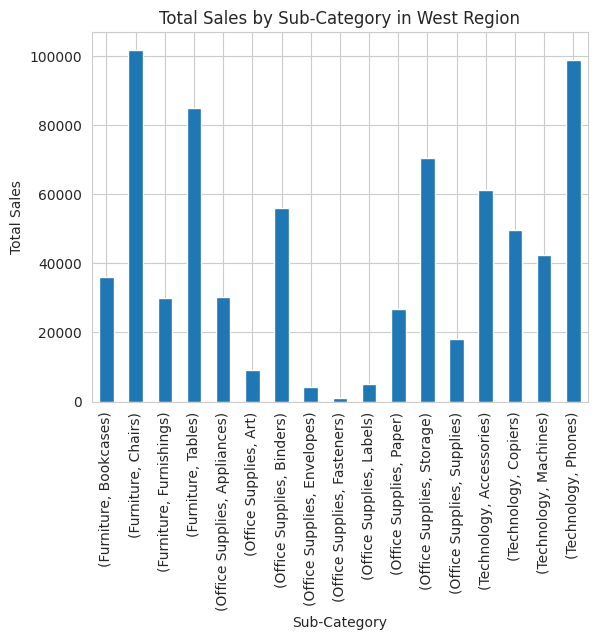

In [39]:
regiondata = data.loc[data['Region'] == "West"]

df1 = regiondata.groupby(["Category", "Sub-Category"])[["Sales"]].sum()

df1["Sales"].plot.bar()
plt.xlabel("Sub-Category")
plt.ylabel("Total Sales")
plt.title("Total Sales by Sub-Category in West Region")
plt.show()

#Total Profit In the Chart by different Classfication

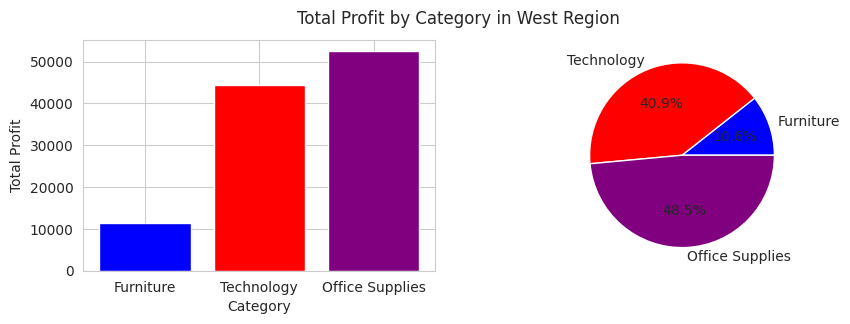

In [69]:
def profitbyvarchart(var, region=None):
    if region is None:
        regiondata = data  # Use all data if region is not provided
        region_text = "All Regions"
    else:
        regiondata = data.loc[data['Region'] == region]
        region_text = region + " Region"


    df1=regiondata.groupby(var)["Profit"].sum().reset_index().sort_values(by="Profit",ascending=True).set_index(var)
    df1.rename(columns={'Profit':'Total Profit'},inplace=True)
    pct = regiondata.groupby(var)[["Profit"]].sum()/regiondata["Profit"].sum()
    pct.rename(columns={'Profit':'Profit Percentage'},inplace=True)
    merged_df = pd.merge(df1,pct,on = var)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

    # Plot the bar chart
    colors = [ 'blue', 'red', 'purple' , 'yellow']
    ax1.bar(merged_df.index, merged_df['Total Profit'], color=colors)
    ax1.set_xlabel(var)
    ax1.set_ylabel('Total Profit')

    # Plot the pie chart
    ax2.pie(merged_df['Profit Percentage'], labels=merged_df.index, autopct='%1.1f%%', colors=colors)
    plt.suptitle("Total Profit by " + var +" in " + region_text)
    plt.show()

# profitbyvarchart("Category")  in all regions
profitbyvarchart("Category","West")

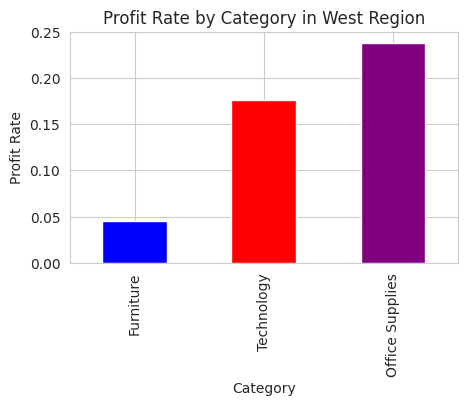

In [70]:
colors = ['blue', 'red', 'purple', 'yellow']
plt.figure(figsize=(5, 3))
kpibyvar("Category", "West")["Profit Rate"].plot.bar(color=colors)
plt.xlabel("Category")
plt.ylabel("Profit Rate")
plt.title("Profit Rate by Category in West Region")
plt.show()

#Calculated the Profit Rate by Sub-catagory
Profit Rate by Descending order within each Category

In [42]:
regiondata = data.loc[data['Region'] == "West"]

df1 = regiondata.groupby(["Category", "Sub-Category"])[["Sales", "Profit"]].sum()
profitrate = df1["Profit"] / df1["Sales"]
df2 = pd.DataFrame(profitrate, columns=["Profit Rate"])
merged_df = pd.merge(df1, df2, left_index=True, right_index=True)
merged_df.rename(columns={'Profit':'Total Profit', 'Sales':'Total Sales'}, inplace=True)


merged_df_sorted = merged_df.sort_values(by=["Category", "Profit Rate"], ascending=[True, False])
merged_df_sorted

Total Sales  Total Profit  Profit Rate
Category        Sub-Category                                        
Furniture       Furnishings    30072.7300     7641.2704     0.254093
                Chairs        101781.3280     4027.5843     0.039571
                Tables         84754.5620     1482.6073     0.017493
                Bookcases      36004.1235    -1646.5117    -0.045731
Office Supplies Envelopes       4118.1000     1908.7624     0.463506
                Paper          26663.7180    12119.2364     0.454522
                Labels          5078.7260     2303.1223     0.453484
                Fasteners        923.2160      275.1907     0.298078
                Binders        55961.1130    16096.8016     0.287643
                Appliances     30236.3360     8261.2699     0.273223
                Art             9212.0660     2374.0970     0.257716
                Storage        70532.8520     8645.3222     0.122572
                Supplies       18127.1220      626.0465     0.034536
Technology      Copiers        49749.2420    19327.2351     0.388493
                Accessories    61114.1160    16484.5983     0.269735
                Phones         98684.3520     9110.7426     0.092322
                Machines       42444.1220     -618.9264    -0.014582

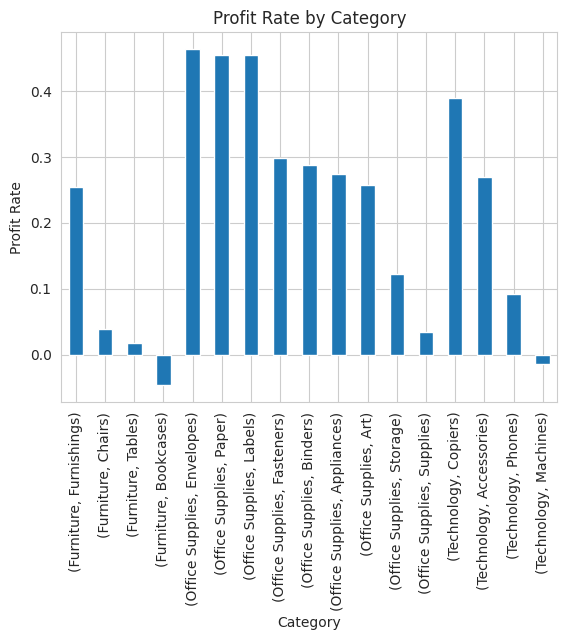

In [43]:
merged_df_sorted["Profit Rate"].plot.bar()
plt.xlabel("Category")
plt.ylabel("Profit Rate")
plt.title("Profit Rate by Category")
plt.show()

#Total Sales by Year in West Region

In [45]:
data = pd.read_excel('/content/input/ECOMM DATA.xlsx')
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Year"] = data["Order Date"].dt.year
data["Month"] = data["Order Date"].dt.month

westdata = data.loc[data['Region'] == "West"]
df_yearly_sales = westdata.groupby(["Year"])["Sales"].sum().reset_index()
df_yearly_sales.rename(columns={'Sales': 'Total Sales'}, inplace=True)
df_yearly_sales.head(5)

,Year,Total Sales
0,2011,147883.0330
1,2012,139966.2495
2,2013,186976.0165
3,2014,250632.5255


In [46]:
df_monthly_sales = westdata.groupby(["Year", "Month"])["Sales"].sum().reset_index()
df_monthly_sales.rename(columns={'Sales': 'Total Sales'}, inplace=True)
df_monthly_sales.head(5)

,Year,Month,Total Sales
0,2011,1,2648.057
1,2011,2,1348.622
2,2011,3,11008.898
3,2011,4,9343.487
4,2011,5,6570.438


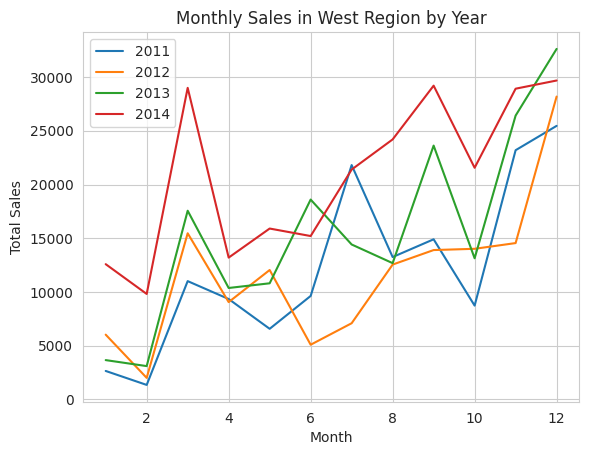

In [71]:
import matplotlib.pyplot as plt

df_monthly_sales = westdata.groupby(["Year", "Month"])["Sales"].sum().reset_index()
df_monthly_sales.rename(columns={'Sales': 'Total Sales'}, inplace=True)

fig, ax = plt.subplots()

for year in df_monthly_sales["Year"].unique():
    df_yearly_sales = df_monthly_sales[df_monthly_sales["Year"] == year]
    ax.plot(df_yearly_sales["Month"], df_yearly_sales["Total Sales"], label=str(year))

plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales in West Region by Year")
ax.legend()
plt.show()

#Calculate Month over Month and Year over Year

In [48]:
import time
import datetime

In [50]:
data = pd.read_excel('/content/input/ECOMM DATA.xlsx')
data["Order Date"]=pd.to_datetime(data["Order Date"])
data1=data[['Order Date','Sales']]
data2=data1.set_index('Order Date').sort_values(by=["Order Date"], ascending=[True])
data2

,Sales
Order Date,
2011-01-01,66.1200
2011-01-01,120.3660
2011-01-01,408.3000
2011-01-01,55.2420
2011-01-01,44.8650
...,...
2014-12-31,26.4000
2014-12-31,1048.7313
2014-12-31,22.9230


In [51]:
data2 = data.resample("M", on="Order Date")["Sales"].sum()
data2 = data2.to_frame()
data2.rename(columns={"Sales": "Total Sales in this month"}, inplace=True)
data2

,Total Sales in this month
Order Date,
2011-01-31,98898.48886
2011-02-28,91152.15698
2011-03-31,145729.36736
2011-04-30,116915.76418
2011-05-31,146747.83610
2011-06-30,215207.38022
2011-07-31,115510.41912
2011-08-31,207581.49122
2011-09-30,290214.45534


In [52]:
data2["MoM"] = data2["Total Sales in this month"].pct_change(periods=1)
data2["YoY"] = data2["Total Sales in this month"].pct_change(periods=12)

data2

,Total Sales in this month,MoM,YoY
Order Date,,,
2011-01-31,98898.48886,NaN,NaN
2011-02-28,91152.15698,-0.078326,NaN
2011-03-31,145729.36736,0.598748,NaN
2011-04-30,116915.76418,-0.197720,NaN
2011-05-31,146747.83610,0.255159,NaN
2011-06-30,215207.38022,0.466511,NaN
2011-07-31,115510.41912,-0.463260,NaN
2011-08-31,207581.49122,0.797080,NaN
2011-09-30,290214.45534,0.398075,NaN


#Returns

In [54]:
data_2 = pd.read_excel('/content/input/ECOMM DATA.xlsx' , sheet_name='Returns')
data_2.head()

,Returned,Order ID,Market
0,Yes,MX-2013-168137,LATAM
1,Yes,US-2011-165316,LATAM
2,Yes,ES-2013-1525878,EU
3,Yes,CA-2013-118311,United States
4,Yes,ES-2011-1276768,EU


In [55]:
return_order = pd.merge(data,data_2,on='Order ID')
return_order

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Market_y
0,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,Yes,APAC
1,26339,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Copiers,"Brother Fax and Copier, Laser",344.682,2,0.1,34.4220,65.35,Critical,Yes,APAC
2,26340,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Storage,"Rogers Folders, Wire Frame",133.920,5,0.1,-6.0300,41.64,Critical,Yes,APAC
3,26342,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Accessories,"Enermax Flash Drive, Erganomic",70.794,2,0.1,25.1340,10.48,Critical,Yes,APAC
4,12069,ES-2014-1651774,2014-09-08,2014-09-14,Standard Class,PJ-18835,Patrick Jones,Corporate,Prato,Tuscany,...,Appliances,"Hoover Stove, Red",7958.580,14,0.0,3979.0800,778.32,Low,Yes,EU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3050,38786,CA-2014-157196,2014-11-06,2014-11-10,Standard Class,AA-10645,Anna Andreadi,Consumer,San Diego,California,...,Paper,Xerox 1996,12.960,2,0.0,6.2208,0.23,Medium,Yes,United States
3051,16897,ES-2014-4359397,2014-08-07,2014-08-10,First Class,TM-21490,Tony Molinari,Consumer,Harrow,England,...,Envelopes,"GlobeWeis Clasp Envelope, Recycled",26.100,3,0.0,6.7500,0.18,Medium,Yes,EU
3052,31743,CA-2014-154214,2014-03-21,2014-03-26,Second Class,TB-21595,Troy Blackwell,Consumer,Columbus,Indiana,...,Furnishings,"GE General Purpose, Extra Long Life, Showcase ...",2.910,1,0.0,1.3677,0.18,Medium,Yes,United States
3053,40998,CA-2013-105291,2013-10-31,2013-11-05,Standard Class,SP-20920,Susan Pistek,Consumer,San Luis Obispo,California,...,Fasteners,Assorted Color Push Pins,3.620,2,0.0,1.1946,0.15,Medium,Yes,United States


In [56]:
return_order["Order Date"] = pd.to_datetime(return_order["Order Date"])
return_order["Year"] = return_order["Order Date"].dt.year

In [57]:
return_by_category = return_order.groupby(['Year','Category'])[["Order ID"]].count()
return_by_category

Order ID
Year Category                 
2011 Furniture             124
     Office Supplies       306
     Technology            119
2012 Furniture             144
     Office Supplies       413
     Technology            138
2013 Furniture             143
     Office Supplies       488
     Technology            172
2014 Furniture             228
     Office Supplies       583
     Technology            197

In [58]:
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Year"] = data["Order Date"].dt.year


total_by_category = data.groupby(['Year','Category'])[["Order ID"]].count()
total_by_category

Order ID
Year Category                 
2011 Furniture            1762
     Office Supplies      5446
     Technology           1790
2012 Furniture            2045
     Office Supplies      6707
     Technology           2210
2013 Furniture            2722
     Office Supplies      8391
     Technology           2686
2014 Furniture            3347
     Office Supplies     10729
     Technology           3455

In [59]:
return_rate = return_by_category["Order ID"] / total_by_category["Order ID"]
df_returnrate = pd.DataFrame({"Return Rate": return_rate})
df_returnrate["Return Rate"] = df_returnrate["Return Rate"]
df_returnrate

Return Rate
Year Category                    
2011 Furniture           0.070375
     Office Supplies     0.056188
     Technology          0.066480
2012 Furniture           0.070416
     Office Supplies     0.061577
     Technology          0.062443
2013 Furniture           0.052535
     Office Supplies     0.058158
     Technology          0.064036
2014 Furniture           0.068121
     Office Supplies     0.054339
     Technology          0.057019

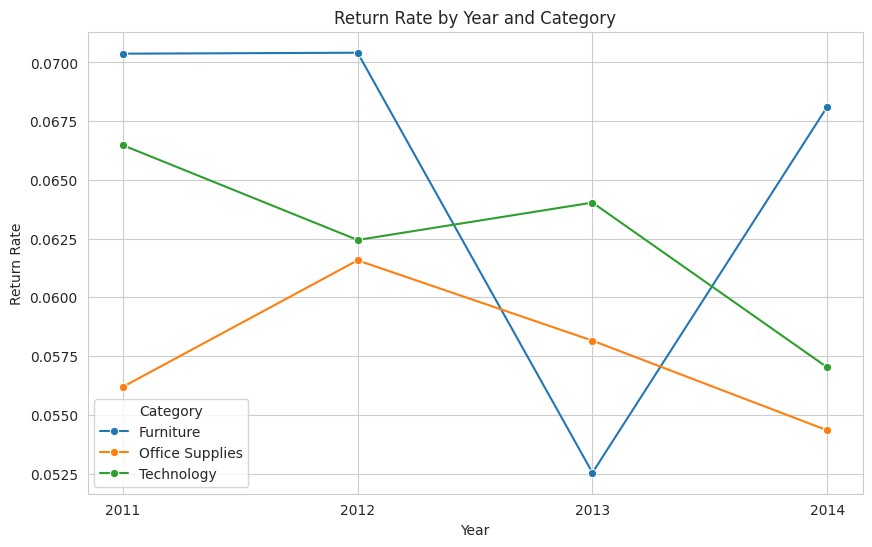

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))

sns.lineplot(data=df_returnrate, x='Year', y='Return Rate', hue='Category', marker='o')


ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.legend(title='Category')
plt.xlabel('Year')
plt.ylabel('Return Rate')
plt.title('Return Rate by Year and Category')

plt.show()

In [61]:
return_by_subcategory = return_order.groupby(['Sub-Category'])[["Order ID"]].count()
return_by_subcategory
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Year"] = data["Order Date"].dt.year
total_by_subcategory = data.groupby(['Sub-Category'])[["Order ID"]].count()
return_rate = return_by_subcategory["Order ID"] / total_by_subcategory["Order ID"]
df_returnrate1 = pd.DataFrame({"Return Rate": return_rate})
df_returnrate1["Return Rate"] = df_returnrate1["Return Rate"]
df_returnrate1

,Return Rate
Sub-Category,
Accessories,0.071545
Appliances,0.071225
Art,0.045669
Binders,0.055104
Bookcases,0.060556
Chairs,0.065230
Copiers,0.060729
Envelopes,0.059959
Fasteners,0.073140


In [62]:
return_by_seg = return_order.groupby(['Segment'])[["Order ID"]].count()
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Year"] = data["Order Date"].dt.year
total_by_seg = data.groupby(['Segment'])[["Order ID"]].count()
return_rate = return_by_seg["Order ID"] / total_by_seg["Order ID"]
df_returnrate = pd.DataFrame({"Return Rate": return_rate})
df_returnrate["Return Rate"] = df_returnrate["Return Rate"]
df_returnrate

,Return Rate
Segment,
Consumer,0.059733
Corporate,0.062933
Home Office,0.053516


In [63]:
return_by_region = return_order.groupby(['Year','Region'])[["Order ID"]].count()
return_by_region

data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Year"] = data["Order Date"].dt.year
total_by_region  = data.groupby(['Year','Region'])[["Order ID"]].count()
total_by_region
return_rate3 = return_by_region ["Order ID"] / total_by_region ["Order ID"]
df_returnrate3 = pd.DataFrame({"Return Rate": return_rate3})
df_returnrate3["Return Rate"] = df_returnrate3["Return Rate"]
df_returnrate3

Return Rate
Year Region                     
2011 Africa                  NaN
     Canada                  NaN
     Caribbean          0.051903
     Central            0.050994
     Central Asia       0.044693
     EMEA                    NaN
     East               0.056093
     North              0.114796
     North Asia         0.195279
     Oceania            0.073394
     South              0.049393
     Southeast Asia     0.050699
     West               0.124054
2012 Africa                  NaN
     Canada                  NaN
     Caribbean          0.052023
     Central            0.059149
     Central Asia       0.027149
     EMEA                    NaN
     East               0.057453
     North              0.146764
     North Asia         0.173824
     Oceania            0.046717
     South              0.046290
     Southeast Asia     0.072086
     West               0.141745
2013 Africa                  NaN
     Canada                  NaN
     Caribbean          0.035225
     Central            0.055646
     Central Asia       0.019569
     EMEA                    NaN
     East               0.045752
     North              0.132225
     North Asia         0.155803
     Oceania            0.036573
     South              0.059247
     Southeast Asia     0.045397
     West               0.158552
2014 Africa                  NaN
     Canada                  NaN
     Caribbean          0.020221
     Central            0.053586
     Central Asia       0.050204
     EMEA                    NaN
     East               0.054230
     North              0.112736
     North Asia         0.180371
     Oceania            0.030176
     South              0.054603
     Southeast Asia     0.036871
     West               0.172884

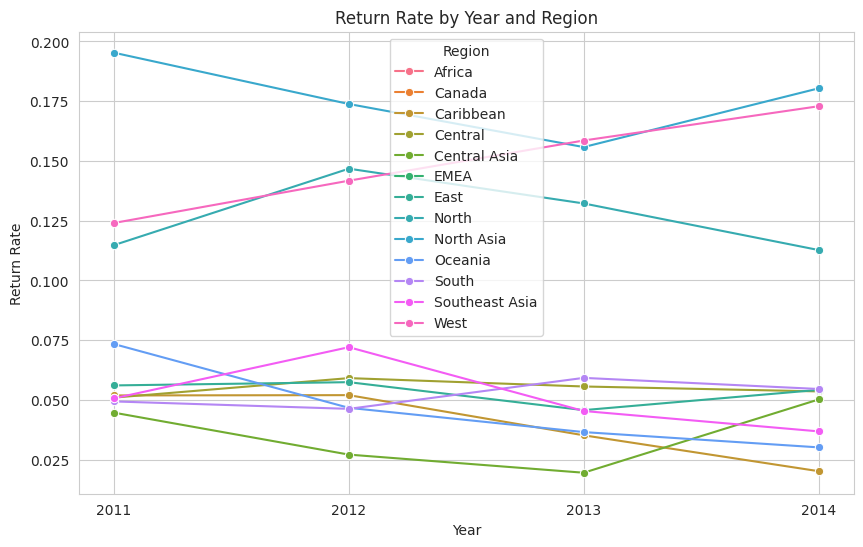

In [64]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_returnrate3, x='Year', y='Return Rate', hue='Region', marker='o')

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.legend(title='Region')
plt.xlabel('Year')
plt.ylabel('Return Rate')
plt.title('Return Rate by Year and Region')

plt.show()

In [65]:
return_order_west = return_order.loc[return_order['Region'] == "West"]
data_west = data.loc[data['Region'] == "West"]

return_by_subcategory2 = return_order_west.groupby(['Sub-Category'])[["Order ID"]].count()
return_by_subcategory2
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Year"] = data["Order Date"].dt.year
total_by_subcategory2 = data_west.groupby(['Sub-Category'])[["Order ID"]].count()
return_rate = return_by_subcategory2["Order ID"] / total_by_subcategory2["Order ID"]
df_returnrate4 = pd.DataFrame({"Return Rate": return_rate})
df_returnrate4["Return Rate"] = df_returnrate4["Return Rate"]
df_returnrate4_sorted = df_returnrate4.sort_values(by='Return Rate', ascending=False)
df_returnrate4_sorted

,Return Rate
Sub-Category,
Fasteners,0.208333
Machines,0.205128
Appliances,0.191176
Binders,0.178344
Paper,0.173333
Chairs,0.169082
Tables,0.155172
Furnishings,0.148026
Phones,0.148014


In [66]:
return_by_seg = return_order_west.groupby(['Segment'])[["Order ID"]].count()

data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Year"] = data["Order Date"].dt.year
total_by_seg = data_west.groupby(['Segment'])[["Order ID"]].count()
return_rate = return_by_seg["Order ID"] / total_by_seg["Order ID"]
df_returnrate5 = pd.DataFrame({"Return Rate": return_rate})
df_returnrate5["Return Rate"] = df_returnrate5["Return Rate"]
df_returnrate5_sorted = df_returnrate5.sort_values(by='Return Rate', ascending=False)
df_returnrate5_sorted

,Return Rate
Segment,
Corporate,0.163542
Consumer,0.155502
Home Office,0.127846
